This is part 2 of Project1_Classification.


<b>CLASSIFICATION: Rain in Australia </b>

The data for the classification part of my project has been taken from Kaggle. The URL for the data set is as follows:
    
URL: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

Description of the dataset:
This dataset consists of weather observations taken across various weather stations in Australia for a duration of 10 years
I have chosen the target variable as RainTomorrow which would be used to predict if it would rain tomorrow in Australia or not. RainTomorrow is bivariate variable and can be one of the following values as output: 

1: Yes - It will rain tomorrow<br>
2: No - It will not rain tomorrow<br><br>

<b>In this project, I am running below machine learning models to predict the outcome of weather in Australia.

Hard voting Classifier<br>
Soft Voting Classifier<br>
Bagging with Decision Tree and SVC<br>
PASTING with Decision Tree and SVC<br>
ADABOOSTING with Decision Tree and Logistic Regression<br>
Gradient Boosting<br>
PCA</b>


Features: 23 <br>
Instances: 145461 <br>
Missing data: Yes<br>
Categorical columns: 7 <br>

FEATURE DESCRIPTION:<br>

Date:- The date when the observation was taken <br>
Location:- Location where the observation was taken<br>
MinTemp:- The minimum temperature in degrees celsius on the date the observation was taken<br>
MaxTemp:- The maximum temperature in degrees celsius on the date the observation was taken<br>
Rainfall:- The amount of rainfall recorded for the day in mm<br>
Evaporation:- The so-called Class A pan evaporation (mm) in the 24 hours to 9am<br>
Sunshine:- The number of hours of bright sunshine in the day.<br>
WindGustDir:- The direction of the strongest wind gust in the 24 hours to midnight<br>
WindGustSpeed:- The speed (km/h) of the strongest wind gust in the 24 hours to midnight<br>
WindDir9am:- Direction of the wind taken at morning 9am<br>
WindDir3pm:- Direction of the wind taken atfternoon 3pm<br>
WindSpeed9am:- Wind speed (km/hr) averaged over 10 minutes prior to 9am<br>
WindSpeed3pm:- Wind speed (km/hr) averaged over 10 minutes prior to 3pm       
Humidity9am:- Humidity(percent)  observed at location at 9am on the day of the observation      
Humidity3pm:- Humidity(percent)  observed at location at 3pm on the day of the observation       
Pressure9am:- Atmospheric pressure (hpa) reduced to mean sea level at 9am        
Pressure3pm:- Atmospheric pressure (hpa) reduced to mean sea level at 3pm        
Cloud9am:- Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths.<br>
Cloud3pm:- Fraction of sky obscured by cloud at 3pm. This is measured in "oktas", which are a unit of eigths.<br>
Temp9am:- Temperature in degrees celsius observed at location at 9am on the day of the observation<br> 
Temp3pm:- Temperature in degrees celsius observed at location at 3pm on the day of the observation<br> 
RainToday:- Boolean value indicating if precipitation (mm) in the 24 hours to 9am exceeds 1mm<br>
RainTomorrow:- The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".<br>

In [1]:
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('weatherAUS.csv')

In [3]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.isnull().sum().sum()

343248

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
len(df)

145460

<b size="3">Thus there are a total of 145460 observations in the data. this dataset is very huge for analysis, and thus needs to be split randomly using train_test_split function into train and test data</b>

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)



In [9]:
len(test)

29092

In [10]:
df = test

In [11]:
print("train shape: {}".format(train.shape))
print("test shape: {}".format(test.shape))

train shape: (116368, 23)
test shape: (29092, 23)


In [12]:
df.RainToday.unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
df.RainTomorrow.unique()

array(['No', 'Yes', nan], dtype=object)

# <u>DATA CLEANING</u></b>

Dropping all the observations which do not have values for either RainToday or RainTomorrow columns in the dataset, as they would not be useful for analysis, since prediction would require training, and I cannot compute these missing values as it would introduce bias into the models.

In [14]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

In [15]:
df.Location.unique()

array(['Ballarat', 'Canberra', 'Richmond', 'BadgerysCreek', 'Portland',
       'AliceSprings', 'Cobar', 'WaggaWagga', 'Launceston', 'Darwin',
       'Hobart', 'Witchcliffe', 'NorfolkIsland', 'Sydney',
       'MelbourneAirport', 'Wollongong', 'Albury', 'Perth', 'Mildura',
       'Woomera', 'Cairns', 'NorahHead', 'Dartmoor', 'SalmonGums',
       'Newcastle', 'GoldCoast', 'Albany', 'Nuriootpa', 'Watsonia',
       'Moree', 'MountGinini', 'PerthAirport', 'Townsville',
       'CoffsHarbour', 'Williamtown', 'Penrith', 'Brisbane', 'Sale',
       'Bendigo', 'Adelaide', 'Walpole', 'Tuggeranong', 'Melbourne',
       'Nhil', 'PearceRAAF', 'Katherine', 'MountGambier', 'Uluru',
       'SydneyAirport'], dtype=object)

In [16]:
df.Date.unique()

array(['2010-04-05', '2016-03-18', '2014-08-08', ..., '2008-05-21',
       '2008-09-08', '2008-03-11'], dtype=object)

In [17]:
df.WindGustDir.unique()

array(['NNE', 'NNW', 'E', 'SSW', 'WSW', nan, 'SW', 'NW', 'SE', 'NE', 'N',
       'ESE', 'S', 'WNW', 'W', 'ENE', 'SSE'], dtype=object)

<b size="3">Since I am using this anlysis to predict whether it would rain the next day in Australia and not for a particular location, hence I am dropping the colum for Location. And since prediction is being made for the next day and not related to a particular date, I am dropping date column as well. <br>
Given that I have separate columns for observations of Wind Direction taken at 9am and 3pm,, I can drop the WindGustDir column as well.</b>

In [18]:
df.drop(['Date', 'Location','WindGustDir'], axis = 1, inplace = True)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28173 entries, 55592 to 127035
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        28076 non-null  float64
 1   MaxTemp        28103 non-null  float64
 2   Rainfall       28173 non-null  float64
 3   Evaporation    16104 non-null  float64
 4   Sunshine       14700 non-null  float64
 5   WindGustSpeed  26277 non-null  float64
 6   WindDir9am     26232 non-null  object 
 7   WindDir3pm     27381 non-null  object 
 8   WindSpeed9am   27959 non-null  float64
 9   WindSpeed3pm   27620 non-null  float64
 10  Humidity9am    27854 non-null  float64
 11  Humidity3pm    27440 non-null  float64
 12  Pressure9am    25398 non-null  float64
 13  Pressure3pm    25397 non-null  float64
 14  Cloud9am       17589 non-null  float64
 15  Cloud3pm       16872 non-null  float64
 16  Temp9am        28024 non-null  float64
 17  Temp3pm        27620 non-null  float64
 18  R

<b size = "3"><u>DATA TRANSFORMATION</u></b>

<b size = "3">Imputing missing values for all the remaining columns</b>

<b size="3">Mean Imputation: </b><br>I will replace all missing values for MinTemp,MaxTemp,Rainfall,Evaporation,Pressure9am,Pressure3pm,Temp9am,Temp3pm and Sunshine features with the mean value of each feature

<b size="3">Median Imputation:</b><br>
I will replace all missing values for WindGustSpeed,WindDir9am,WindDir3pm,Humidity9am,Humidity3pm,Cloud9am and Cloud3pm features with the median value of each feature

In [20]:
df.MinTemp.isnull().value_counts()

False    28076
True        97
Name: MinTemp, dtype: int64

In [21]:
df["MinTemp"].replace(np.nan,round(df['MinTemp'].mean(),1),inplace=True)

In [22]:
df.MaxTemp.isnull().value_counts()

False    28103
True        70
Name: MaxTemp, dtype: int64

In [23]:
df["MaxTemp"].replace(np.nan,round(df['MaxTemp'].mean(),1),inplace=True)

In [24]:
df.Rainfall.isnull().value_counts()

False    28173
Name: Rainfall, dtype: int64

In [25]:
df["Rainfall"].replace(np.nan,round(df['Rainfall'].mean(),1),inplace=True) 

In [26]:
df.Evaporation.isnull().value_counts()

False    16104
True     12069
Name: Evaporation, dtype: int64

In [27]:
df["Evaporation"].replace(np.nan,round(df['Evaporation'].mean(),1),inplace=True)

In [28]:
df.Sunshine.isnull().value_counts()

False    14700
True     13473
Name: Sunshine, dtype: int64

In [29]:
df["Sunshine"].replace(np.nan,round(df['Sunshine'].mean(),1),inplace=True)

In [30]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
55592,9.4,23.5,0.2,5.5,7.6,46.0,NNE,N,28.0,24.0,56.0,46.0,1017.5,1014.4,2.0,3.0,17.6,22.2,No,No
48558,14.0,19.6,7.4,5.5,7.6,87.0,N,WNW,24.0,46.0,95.0,49.0,1001.3,996.7,8.0,NaN,16.8,19.3,Yes,Yes
29123,0.1,18.9,0.0,5.5,7.6,22.0,S,ENE,2.0,13.0,88.0,49.0,1032.7,1029.1,4.0,NaN,7.1,18.3,No,No
4267,10.0,13.2,11.6,5.5,7.6,20.0,SW,SW,11.0,9.0,97.0,99.0,1023.2,1021.3,NaN,NaN,11.1,12.5,Yes,Yes
76864,11.5,15.4,1.2,1.6,4.9,43.0,WSW,WSW,22.0,26.0,88.0,85.0,1010.7,1014.0,8.0,8.0,13.2,13.4,Yes,No


In [31]:
df.WindGustSpeed.isnull().value_counts()

False    26277
True      1896
Name: WindGustSpeed, dtype: int64

In [32]:
df["WindGustSpeed"].replace(np.nan,round(df['WindGustSpeed'].median(),0),inplace=True)

In [33]:
df.WindDir9am.isnull().value_counts()

False    26232
True      1941
Name: WindDir9am, dtype: int64

In [34]:
df.WindSpeed9am.isnull().value_counts()

False    27959
True       214
Name: WindSpeed9am, dtype: int64

In [35]:
df["WindSpeed9am"].replace(np.nan,round(df['WindSpeed9am'].median(),0),inplace=True)

In [36]:
df.WindSpeed3pm.isnull().value_counts()

False    27620
True       553
Name: WindSpeed3pm, dtype: int64

In [37]:
df["WindSpeed3pm"].replace(np.nan,round(df['WindSpeed3pm'].median(),0),inplace=True)

In [38]:
df.Humidity9am.isnull().value_counts()

False    27854
True       319
Name: Humidity9am, dtype: int64

In [39]:
df["Humidity9am"].replace(np.nan,round(df['Humidity9am'].median(),0),inplace=True)

In [40]:
df.Humidity3pm.isnull().value_counts()

False    27440
True       733
Name: Humidity3pm, dtype: int64

In [41]:
df["Humidity3pm"].replace(np.nan,round(df['Humidity3pm'].median(),0),inplace=True)

In [42]:
df.Pressure9am.isnull().value_counts()

False    25398
True      2775
Name: Pressure9am, dtype: int64

In [43]:
df["Pressure9am"].replace(np.nan,round(df['Pressure9am'].mean(),1),inplace=True)

In [44]:
df.Pressure3pm.isnull().value_counts()

False    25397
True      2776
Name: Pressure3pm, dtype: int64

In [45]:
df["Pressure3pm"].replace(np.nan,round(df['Pressure3pm'].mean(),1),inplace=True)

In [46]:
df.Cloud9am.isnull().value_counts()

False    17589
True     10584
Name: Cloud9am, dtype: int64

In [47]:
df.Cloud9am.unique()

array([ 2.,  8.,  4., nan,  7.,  0.,  1.,  5.,  6.,  3.])

In [48]:
df["Cloud9am"].replace(np.nan,round(df['Cloud9am'].median(),0),inplace=True)

In [49]:
df.Cloud3pm.isnull().value_counts()

False    16872
True     11301
Name: Cloud3pm, dtype: int64

In [50]:
df.Cloud3pm.unique()

array([ 3., nan,  8.,  7.,  5.,  0.,  1.,  6.,  4.,  2.,  9.])

In [51]:
df["Cloud3pm"].replace(np.nan,round(df['Cloud3pm'].median(),0),inplace=True)

In [52]:
df.Temp9am.isnull().value_counts()

False    28024
True       149
Name: Temp9am, dtype: int64

In [53]:
df["Temp9am"].replace(np.nan,round(df['Temp9am'].mean(),1),inplace=True)

In [54]:
df.Temp3pm.isnull().value_counts()

False    27620
True       553
Name: Temp3pm, dtype: int64

In [55]:
df["Temp3pm"].replace(np.nan,round(df['Temp3pm'].mean(),1),inplace=True)

In [56]:
df.RainToday.isnull().value_counts()

False    28173
Name: RainToday, dtype: int64

In [57]:
df.RainTomorrow.isnull().value_counts()

False    28173
Name: RainTomorrow, dtype: int64

<b size = "3"> <u>CREATING MAPPINGS FOR RAIN TODAY AND TOMORROW</u></b>

<b size="3">In statistical models, while converting any variables to a map, in general, we give 0 to the lower occuring value and 1 for the highest occuring value. however, for analysis, people would observe 0 --> No and 1 --> Yes. Thus, I have assigned 0 as No and 1 as yes for RainToday and RainTomorrow columns</b>

In [58]:
df.RainToday.value_counts()

No     21880
Yes     6293
Name: RainToday, dtype: int64

In [59]:
df["RainToday"]=df["RainToday"].map({"No":0,"Yes":1}).astype(int)

In [60]:
df["RainTomorrow"]=df["RainTomorrow"].map({"No":0,"Yes":1}).astype(int)

In [61]:
df.RainToday.value_counts()

0    21880
1     6293
Name: RainToday, dtype: int64

In [62]:
df.RainTomorrow.value_counts()

0    21872
1     6301
Name: RainTomorrow, dtype: int64

In [63]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
55592,9.4,23.5,0.2,5.5,7.6,46.0,NNE,N,28.0,24.0,56.0,46.0,1017.5,1014.4,2.0,3.0,17.6,22.2,0,0
48558,14.0,19.6,7.4,5.5,7.6,87.0,N,WNW,24.0,46.0,95.0,49.0,1001.3,996.7,8.0,5.0,16.8,19.3,1,1
29123,0.1,18.9,0.0,5.5,7.6,22.0,S,ENE,2.0,13.0,88.0,49.0,1032.7,1029.1,4.0,5.0,7.1,18.3,0,0
4267,10.0,13.2,11.6,5.5,7.6,20.0,SW,SW,11.0,9.0,97.0,99.0,1023.2,1021.3,5.0,5.0,11.1,12.5,1,1
76864,11.5,15.4,1.2,1.6,4.9,43.0,WSW,WSW,22.0,26.0,88.0,85.0,1010.7,1014.0,8.0,8.0,13.2,13.4,1,0


In [64]:
df.WindDir9am.unique()

array(['NNE', 'N', 'S', 'SW', 'WSW', 'SE', 'ESE', 'NE', 'NNW', 'SSE', nan,
       'W', 'SSW', 'ENE', 'NW', 'WNW', 'E'], dtype=object)

In [65]:
df.WindDir3pm.unique()

array(['N', 'WNW', 'ENE', 'SW', 'WSW', 'ESE', 'E', 'W', 'NNW', 'SE',
       'NNE', 'SSW', 'SSE', 'NW', 'S', 'NE', nan], dtype=object)

In [66]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
55592,9.4,23.5,0.2,5.5,7.6,46.0,NNE,N,28.0,24.0,56.0,46.0,1017.5,1014.4,2.0,3.0,17.6,22.2,0,0
48558,14.0,19.6,7.4,5.5,7.6,87.0,N,WNW,24.0,46.0,95.0,49.0,1001.3,996.7,8.0,5.0,16.8,19.3,1,1
29123,0.1,18.9,0.0,5.5,7.6,22.0,S,ENE,2.0,13.0,88.0,49.0,1032.7,1029.1,4.0,5.0,7.1,18.3,0,0
4267,10.0,13.2,11.6,5.5,7.6,20.0,SW,SW,11.0,9.0,97.0,99.0,1023.2,1021.3,5.0,5.0,11.1,12.5,1,1
76864,11.5,15.4,1.2,1.6,4.9,43.0,WSW,WSW,22.0,26.0,88.0,85.0,1010.7,1014.0,8.0,8.0,13.2,13.4,1,0


In [67]:
print(df.WindDir9am.value_counts())
print(df.WindDir3pm.value_counts())


N      2203
SE     1814
E      1763
SSE    1753
W      1738
S      1693
NW     1653
ENE    1633
NNE    1615
SW     1584
NNW    1577
SSW    1478
ESE    1476
NE     1442
WNW    1414
WSW    1396
Name: WindDir9am, dtype: int64
SE     2128
W      2003
S      1880
WSW    1872
SSE    1832
SW     1814
WNW    1734
N      1715
NW     1684
E      1682
SSW    1590
NNW    1574
ESE    1570
NE     1568
ENE    1486
NNE    1249
Name: WindDir3pm, dtype: int64


<b size="3">Based on the above output, we can see the unique values for WindDir9am and WindDir3pm columns. Thus if I perform a one-hot vector encoding for these columns, it will generate many columns, and thus I am removing observations having the below values in these columns</b>

In [68]:
windDir = ['SSE','NNE','NNW','ENE','SSW','ESE','WNW','WSW']

df = df[~df.WindDir9am.isin(windDir)]

df = df[~df.WindDir3pm.isin(windDir)]

In [69]:
len(df)

8805

In [70]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4267,10.0,13.2,11.6,5.5,7.6,20.0,SW,SW,11.0,9.0,97.0,99.0,1023.2,1021.3,5.0,5.0,11.1,12.5,1,1
36534,12.5,39.1,0.0,13.0,13.6,72.0,NE,W,6.0,30.0,23.0,3.0,1011.4,1007.4,0.0,0.0,25.8,37.4,0,0
132540,11.2,22.0,0.0,6.2,12.3,31.0,N,SE,9.0,20.0,65.0,58.0,1027.0,1024.5,1.0,1.0,16.0,21.1,0,0
22850,18.3,23.1,0.0,5.6,2.9,35.0,SE,SE,19.0,20.0,88.0,67.0,1014.0,1012.4,7.0,7.0,20.4,22.1,0,0
65544,10.8,26.6,0.0,7.2,1.8,76.0,N,N,52.0,43.0,51.0,36.0,1017.9,1014.3,7.0,6.0,16.2,23.8,0,0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8805 entries, 4267 to 103071
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        8805 non-null   float64
 1   MaxTemp        8805 non-null   float64
 2   Rainfall       8805 non-null   float64
 3   Evaporation    8805 non-null   float64
 4   Sunshine       8805 non-null   float64
 5   WindGustSpeed  8805 non-null   float64
 6   WindDir9am     7532 non-null   object 
 7   WindDir3pm     8161 non-null   object 
 8   WindSpeed9am   8805 non-null   float64
 9   WindSpeed3pm   8805 non-null   float64
 10  Humidity9am    8805 non-null   float64
 11  Humidity3pm    8805 non-null   float64
 12  Pressure9am    8805 non-null   float64
 13  Pressure3pm    8805 non-null   float64
 14  Cloud9am       8805 non-null   float64
 15  Cloud3pm       8805 non-null   float64
 16  Temp9am        8805 non-null   float64
 17  Temp3pm        8805 non-null   float64
 18  Rai

<b size="3"><u>Mode Imputation:</u></b><br>
Here, I am replacing all missing values for WindDir9am and WindDir3pm features with highest occuring values for those features.   

In [72]:
df['WindDir9am'].fillna(df['WindDir9am'].mode()[0], inplace = True)
df['WindDir9am'].value_counts()

N     2517
SE     989
W      945
E      935
NW     916
S      871
SW     845
NE     787
Name: WindDir9am, dtype: int64

In [73]:
df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0], inplace = True)
df['WindDir3pm'].value_counts()

SE    1843
W     1124
S     1046
N     1002
NW     996
SW     984
E      910
NE     900
Name: WindDir3pm, dtype: int64

<b size = "3"><u>ONE-HOT VECTOR ENCODING</u></b>

Now performing the one-hot vector encoding for WindDir9am and WindDir3pm features

In [74]:
cols=pd.get_dummies(df["WindDir9am"],prefix="WindDir9am")
df[cols.columns]=cols
df.drop("WindDir9am",axis=1,inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,...,RainToday,RainTomorrow,WindDir9am_E,WindDir9am_N,WindDir9am_NE,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SW,WindDir9am_W
4267,10.0,13.2,11.6,5.5,7.6,20.0,SW,11.0,9.0,97.0,...,1,1,0,0,0,0,0,0,1,0
36534,12.5,39.1,0.0,13.0,13.6,72.0,W,6.0,30.0,23.0,...,0,0,0,0,1,0,0,0,0,0
132540,11.2,22.0,0.0,6.2,12.3,31.0,SE,9.0,20.0,65.0,...,0,0,0,1,0,0,0,0,0,0
22850,18.3,23.1,0.0,5.6,2.9,35.0,SE,19.0,20.0,88.0,...,0,0,0,0,0,0,0,1,0,0
65544,10.8,26.6,0.0,7.2,1.8,76.0,N,52.0,43.0,51.0,...,0,0,0,1,0,0,0,0,0,0


In [75]:
cols=pd.get_dummies(df["WindDir3pm"],prefix="WindDir3pm")
df[cols.columns]=cols
df.drop("WindDir3pm",axis=1,inplace=True)
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir9am_SW,WindDir9am_W,WindDir3pm_E,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SW,WindDir3pm_W
4267,10.0,13.2,11.6,5.5,7.6,20.0,11.0,9.0,97.0,99.0,...,1,0,0,0,0,0,0,0,1,0
36534,12.5,39.1,0.0,13.0,13.6,72.0,6.0,30.0,23.0,3.0,...,0,0,0,0,0,0,0,0,0,1
132540,11.2,22.0,0.0,6.2,12.3,31.0,9.0,20.0,65.0,58.0,...,0,0,0,0,0,0,0,1,0,0
22850,18.3,23.1,0.0,5.6,2.9,35.0,19.0,20.0,88.0,67.0,...,0,0,0,0,0,0,0,1,0,0
65544,10.8,26.6,0.0,7.2,1.8,76.0,52.0,43.0,51.0,36.0,...,0,0,0,1,0,0,0,0,0,0


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8805 entries, 4267 to 103071
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        8805 non-null   float64
 1   MaxTemp        8805 non-null   float64
 2   Rainfall       8805 non-null   float64
 3   Evaporation    8805 non-null   float64
 4   Sunshine       8805 non-null   float64
 5   WindGustSpeed  8805 non-null   float64
 6   WindSpeed9am   8805 non-null   float64
 7   WindSpeed3pm   8805 non-null   float64
 8   Humidity9am    8805 non-null   float64
 9   Humidity3pm    8805 non-null   float64
 10  Pressure9am    8805 non-null   float64
 11  Pressure3pm    8805 non-null   float64
 12  Cloud9am       8805 non-null   float64
 13  Cloud3pm       8805 non-null   float64
 14  Temp9am        8805 non-null   float64
 15  Temp3pm        8805 non-null   float64
 16  RainToday      8805 non-null   int32  
 17  RainTomorrow   8805 non-null   int32  
 18  Win

In [77]:
(df.isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
WindDir9am_E     0
WindDir9am_N     0
WindDir9am_NE    0
WindDir9am_NW    0
WindDir9am_S     0
WindDir9am_SE    0
WindDir9am_SW    0
WindDir9am_W     0
WindDir3pm_E     0
WindDir3pm_N     0
WindDir3pm_NE    0
WindDir3pm_NW    0
WindDir3pm_S     0
WindDir3pm_SE    0
WindDir3pm_SW    0
WindDir3pm_W     0
dtype: int64

<b size = "3">Based on the above output, we can see that we do not have any more missing values in the dataset and thus can begin with next steps of visualization. The above Data cleaning and transformation logic has been taken from Project 1</b>

<b size = "3"><u>Train-Test Split</u></b>

<b size ="3"> Defining X and Y for all models</b>

In [79]:
X = df.drop('RainTomorrow', axis = 1)
y = df['RainTomorrow']

<b size ="3"> Split dataset into Train and Test</b>

In [80]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [81]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_orig)
X_test = scaler.transform(X_test_orig)

### Note: I have used Confusion Matrix and ROC_AUC score as final evalution matrix for Project 1. For Project2, I will be using ROC_AUC evaluation matrix. 

# Hard voting Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score

log_l1 = LogisticRegression(penalty = 'l1', C = 10, solver = 'liblinear', max_iter = 10000)
log_l1.fit(X_train, y_train)

dtree = DecisionTreeClassifier(max_depth = 5 , min_samples_leaf = 10, min_samples_split = 10, min_impurity_decrease =0.0002 ,random_state=0)
dtree.fit(X_train, y_train)

svm_clf = SVC(kernel='rbf', C=100,gamma = 0.01, random_state = 0)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_l1), ('dt', dtree), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

for clf in (log_l1, dtree, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.4f'%roc_auc_score(y_test, y_pred))

LogisticRegression 0.7179
DecisionTreeClassifier 0.6853
SVC 0.7105
VotingClassifier 0.7089


# Soft Voting Classifier

In [83]:
log_l1 = LogisticRegression(penalty = 'l1', C = 10, solver = 'liblinear', max_iter = 10000)
log_l1.fit(X_train, y_train)

dtree = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10, min_samples_split = 10, min_impurity_decrease = 0.0002 ,random_state=0)
dtree.fit(X_train, y_train)

svm_clf = SVC(kernel='rbf', C=100,gamma = 0.01, random_state = 0,probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_l1), ('dt',dtree), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (log_l1, dtree , svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, '%.4f'%roc_auc_score(y_test, y_pred))

LogisticRegression 0.7179
DecisionTreeClassifier 0.6853
SVC 0.7105
VotingClassifier 0.7169


# Bagging

I have used grid search here for the best n_estimators. All the other parameters used in the classifier are already selected through grid search in the Project 1

### Decision Tree

In [84]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {'n_estimators':[100,500,1000]}

In [85]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10, min_samples_split = 10, min_impurity_decrease = 0.0002 ,random_state=0)
bag_clf = BaggingClassifier(dt_clf, max_samples=100, bootstrap=True, random_state=0, oob_score = True)

bag_grid = GridSearchCV(bag_clf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc' )
bag_grid.fit(X_train, y_train)



GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                               min_impurity_decrease=0.0002,
                                                                               min_samples_leaf=10,
                                                                               min_samples_split=10,
                                                                               random_state=0),
                                         max_samples=100, oob_score=True,
                                         random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [100, 500, 1000]},
             scoring='roc_auc')

In [86]:
print("Best parameters: {}".format(bag_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(bag_grid.best_score_))

Best parameters: {'n_estimators': 1000}
Best cross-validation score: 0.84


In [87]:
bag_clf = BaggingClassifier(dt_clf,max_samples=100,n_estimators =1000 ,bootstrap=True, random_state=0, oob_score = True)

In [88]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        min_impurity_decrease=0.0002,
                                                        min_samples_leaf=10,
                                                        min_samples_split=10,
                                                        random_state=0),
                  max_samples=100, n_estimators=1000, oob_score=True,
                  random_state=0)

In [89]:
y_pred = bag_clf.predict(X_test)

In [90]:
from  sklearn.metrics import roc_auc_score

print('Train score: %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))
print('Out-of-bag score: %.2f'%bag_clf.oob_score_)

Train score: 0.83
Test score: 0.84
Out-of-bag score: 0.83


### SVC

In [91]:
param_grid = {'n_estimators':[100,500,1000]}

In [92]:
from sklearn.svm import SVC
svc_clf = SVC(kernel='rbf', C=100,gamma = 0.01)
bag_clf = BaggingClassifier(svc_clf, max_samples=100, bootstrap=True, random_state=0, oob_score = True)

In [93]:
bag_grid = GridSearchCV(bag_clf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc' )

In [94]:
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=SVC(C=100, gamma=0.01),
                                         max_samples=100, oob_score=True,
                                         random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [100, 500, 1000]},
             scoring='roc_auc')

In [95]:
print("Best parameters: {}".format(bag_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(bag_grid.best_score_))

Best parameters: {'n_estimators': 1000}
Best cross-validation score: 0.85


In [96]:
bag_clf = BaggingClassifier(svc_clf,max_samples=100,n_estimators =1000 ,bootstrap=True, random_state=0, oob_score = True)

In [97]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(C=100, gamma=0.01), max_samples=100,
                  n_estimators=1000, oob_score=True, random_state=0)

In [98]:
y_pred = bag_clf.predict(X_test)

In [99]:
from  sklearn.metrics import accuracy_score
print('Train score: %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))
print('Out-of-bag score: %.2f'%bag_clf.oob_score_)

Train score: 0.83
Test score: 0.84
Out-of-bag score: 0.83


# PASTING

All the other parameters used in the classifier are already selected through grid search in the Project 1. For Pasting , I have used Decision Tree and SVC models.

### Decision Tree

In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {'n_estimators':[100, 500 , 1000]}

In [101]:
dt_clf = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10, min_samples_split = 10, min_impurity_decrease = 0.0002 ,random_state=0)
bag_clf = BaggingClassifier(dt_clf, max_samples=100, bootstrap=False, random_state=0)

In [102]:
bag_grid = GridSearchCV(bag_clf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc' )

In [103]:
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                               min_impurity_decrease=0.0002,
                                                                               min_samples_leaf=10,
                                                                               min_samples_split=10,
                                                                               random_state=0),
                                         bootstrap=False, max_samples=100,
                                         random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [100, 500, 1000]},
             scoring='roc_auc')

In [104]:
print("Best parameters: {}".format(bag_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(bag_grid.best_score_))

Best parameters: {'n_estimators': 500}
Best cross-validation score: 0.84


In [105]:
bag_clf = BaggingClassifier(dt_clf, max_samples=100,n_estimators = 1000, bootstrap= False, random_state=0)

In [106]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                        min_impurity_decrease=0.0002,
                                                        min_samples_leaf=10,
                                                        min_samples_split=10,
                                                        random_state=0),
                  bootstrap=False, max_samples=100, n_estimators=1000,
                  random_state=0)

In [107]:
from  sklearn.metrics import accuracy_score
print('Train score: %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))

Train score: 0.83
Test score: 0.84


### SVC

In [108]:
param_grid = {'n_estimators':[100, 500 , 1000]}

In [109]:
svc_clf = SVC(kernel='rbf', C=100,gamma = 0.01)
bag_clf = BaggingClassifier(svc_clf, max_samples=100, bootstrap=False, random_state=0)
bag_grid = GridSearchCV(bag_clf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc' )

In [110]:
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=SVC(C=100, gamma=0.01),
                                         bootstrap=False, max_samples=100,
                                         random_state=0),
             n_jobs=-1, param_grid={'n_estimators': [100, 500, 1000]},
             scoring='roc_auc')

In [111]:
print("Best parameters: {}".format(bag_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(bag_grid.best_score_))

Best parameters: {'n_estimators': 1000}
Best cross-validation score: 0.85


In [112]:
bag_clf = BaggingClassifier(svc_clf, n_estimators =1000 , max_samples=100, bootstrap = False, random_state=0)

In [113]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [114]:
from  sklearn.metrics import accuracy_score
print('Train score: %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))

Train score: 0.83
Test score: 0.84


# ADABOOSTING

I have chosen two models for adaboosting - Decision tree and Logistic Regression.All the parameters are already obtained through grid search. So I have just used grid search to get the best - n_estimators and Learning rate

### Decision Tree

In [115]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[100, 500 , 1000], 
              'learning_rate':[0.1, 0.5, 1 ]}


In [116]:
bag_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10, min_samples_split = 10, min_impurity_decrease =0.0002,random_state = 0 ),algorithm="SAMME.R", random_state=0)
bag_grid = GridSearchCV(bag_clf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc' )
bag_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                                                min_impurity_decrease=0.0002,
                                                                                min_samples_leaf=10,
                                                                                min_samples_split=10,
                                                                                random_state=0),
                                          random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [100, 500, 1000]},
             scoring='roc_auc')

In [117]:
print("Best parameters: {}".format(bag_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(bag_grid.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 1000}
Best cross-validation score: 0.83


In [118]:
bag_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 10, min_samples_split = 10, min_impurity_decrease =0.0002,random_state = 0 ),n_estimators = 1000 , learning_rate = 0.1 , algorithm="SAMME.R", random_state=0)


In [119]:
bag_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5,
                                                         min_impurity_decrease=0.0002,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         random_state=0),
                   learning_rate=0.1, n_estimators=1000, random_state=0)

In [120]:
print('Train score: %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))

Train score: 1.00
Test score: 0.83


Based on the above output, we can see that this model is overfitted given that Train score is 1.0

### Logistic Regression

In [121]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators':[100, 500 , 1000], 
              'learning_rate':[0.1, 0.5, 1 ]}

In [122]:
log_l1 = LogisticRegression(penalty = 'l2', C = 10 , solver = 'liblinear', max_iter = 500)
log_ada = AdaBoostClassifier(log_l1,algorithm="SAMME.R", random_state=0)

In [123]:
svc_grid = GridSearchCV(log_ada, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc' )
svc_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression(C=10,
                                                                            max_iter=500,
                                                                            solver='liblinear'),
                                          random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'n_estimators': [100, 500, 1000]},
             scoring='roc_auc')

In [124]:
print("Best parameters: {}".format(svc_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(svc_grid.best_score_))

Best parameters: {'learning_rate': 1, 'n_estimators': 1000}
Best cross-validation score: 0.86


In [125]:
log_ada = AdaBoostClassifier(log_ada,algorithm="SAMME.R",n_estimators = 1000 ,learning_rate = 1,  random_state=0)

In [126]:
log_ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=AdaBoostClassifier(base_estimator=LogisticRegression(C=10,
                                                                                       max_iter=500,
                                                                                       solver='liblinear'),
                                                     random_state=0),
                   learning_rate=1, n_estimators=1000, random_state=0)

In [127]:
print('Train score: %.2f'%log_ada.score(X_train, y_train))
print('Test score: %.2f'%log_ada.score(X_test, y_test))

Train score: 0.84
Test score: 0.84


# Gradient Boosting

In [128]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators':[100, 500 , 1000], 
              'learning_rate':[0.1, 0.5, 1 ],
            'max_depth' : [1,2,3]}

clf = GradientBoostingClassifier(random_state=0)

In [129]:
gbc_grid = GridSearchCV(clf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring = 'roc_auc' )

In [130]:
gbc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 1], 'max_depth': [1, 2, 3],
                         'n_estimators': [100, 500, 1000]},
             scoring='roc_auc')

In [131]:
print("Best parameters: {}".format(gbc_grid.best_params_))
print("Best cross-validation score: {:.2f}".format(gbc_grid.best_score_))

Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
Best cross-validation score: 0.86


In [132]:
gbrt = GradientBoostingClassifier(max_depth = 2,n_estimators = 500, learning_rate=0.1, random_state=0,)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=2, n_estimators=500, random_state=0)

In [133]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.877
Accuracy on test set: 0.852


# PCA

In [134]:
from sklearn.decomposition import PCA
pca = PCA(n_components= 0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

### KNN Classifier

In [135]:
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, return_train_score=True,scoring= 'roc_auc')

In [137]:
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             return_train_score=True, scoring='roc_auc')

In [138]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'n_neighbors': 19}
Best cross-validation score: 0.78


In [139]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(30)
knn.fit(X_train_pca, y_train)
Test_score = knn.score(X_test_pca, y_test)
Train_score = knn.score(X_train_pca, y_train)
print('KNN-Testscore-pca',Test_score)
print('KNN-Trainscore-pca',Train_score)

KNN-Testscore-pca 0.8033605812897366
KNN-Trainscore-pca 0.8090262002120249


### Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
c_range=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
grid = {"C": c_range , "penalty":["l1","l2"],"solver":["liblinear"]}
logreg = LogisticRegression(max_iter = 10000)
logreg_cv = GridSearchCV(logreg,grid,cv= 5)
logreg_cv.fit(X_train_pca,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']})

In [141]:
print("tuned Hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("Cross validation score :",logreg_cv.best_score_)

tuned Hyperparameters :(best parameters)  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Cross validation score : 0.8302290505356364


In [142]:
from sklearn.linear_model import LogisticRegression
log_l1 = LogisticRegression(penalty = 'l2', C = 10, solver = 'liblinear', max_iter = 500)

In [143]:
log_l1.fit(X_train_pca, y_train)
train_score = (log_l1.score(X_train_pca, y_train))
test_score = (log_l1.score(X_test_pca, y_test))
print('Train Score-pca',train_score)
print('Test Score-pca' ,test_score)

Train Score-pca 0.8296228986824171
Test Score-pca 0.832425068119891


### Linear SVC

In [144]:
from sklearn.svm import LinearSVC
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100]}

In [145]:
svm = LinearSVC(C = param_grid, max_iter = 40000)
logreg_cv = GridSearchCV(svm,param_grid,cv= 5)

In [146]:
logreg_cv.fit(X_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=LinearSVC(C={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                                 max_iter=40000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [147]:
print("tuned Hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("Cross validation score :",logreg_cv.best_score_)

tuned Hyperparameters :(best parameters)  {'C': 0.1}
Cross validation score : 0.8294709012914918


In [148]:
from sklearn.svm import SVC, LinearSVC
svm = LinearSVC(C=1 )

In [149]:
svm.fit(X_train_pca, y_train)
train_score = (svm.score(X_train_pca, y_train))
test_score = (svm.score(X_test_pca, y_test))
print('Train Score-pca',train_score)
print('Test Score-pca' ,test_score)

Train Score-pca 0.8291685597455702
Test Score-pca 0.8374205267938238


### SVC with RBF Kernel

In [150]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_search_rbf = GridSearchCV(SVC(kernel = 'rbf'), param_grid, cv=5, return_train_score=True)

In [152]:
grid_search_rbf.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [153]:
print("Best parameters: {}".format(grid_search_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rbf.best_score_))

Best parameters: {'C': 100, 'gamma': 0.001}
Best cross-validation score: 0.83


In [154]:
clf = SVC(kernel='rbf', C = 100 ,gamma = 0.1  )
clf.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.1)

In [155]:
clf.fit(X_train_pca, y_train)
train_score = (clf.score(X_train_pca, y_train))
test_score = (clf.score(X_test_pca, y_test))
print('Train Score-pca',train_score)
print('Test Score-pca' ,test_score)

Train Score-pca 0.8447675299106466
Test Score-pca 0.8401453224341507


### SVC with poly Kernel

In [156]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'degree': [1,2,3,4,5,6,7,8,9,10]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [157]:
grid_search_poly = GridSearchCV(SVC(kernel = 'poly'),param_grid, cv=5, return_train_score=True)

In [158]:
grid_search_poly.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [159]:
print("tuned Hyperparameters :(best parameters) ",grid_search_poly.best_params_)
print("Cross validation score :",grid_search_poly.best_score_)

tuned Hyperparameters :(best parameters)  {'C': 1, 'degree': 1}
Cross validation score : 0.8300768472002386


In [160]:
clf2 = SVC(kernel='poly', C= 10, degree = 3)

In [161]:
clf2.fit(X_train_pca, y_train)

SVC(C=10, kernel='poly')

In [162]:
train_score = (clf2.score(X_train_pca, y_train))
test_score = (clf2.score(X_test_pca, y_test))
print('Train Score-pca',train_score)
print('Test Score-pca' ,test_score)

Train Score-pca 0.8555202180826896
Test Score-pca 0.8356039963669392


### SVC with Linear Kernel

In [163]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [164]:
grid_search = GridSearchCV(SVC(kernel = 'linear'), param_grid, cv=5, return_train_score=True)

In [165]:
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

In [166]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.83


In [167]:
clf3 = SVC(kernel='linear', C=1 )
clf3.fit(X_train_pca, y_train)

SVC(C=1, kernel='linear')

In [168]:
train_score = (clf3.score(X_train_pca, y_train))
test_score = (clf3.score(X_test_pca, y_test))
print('Train Score-pca',(clf3.score(X_train_pca, y_train)))
print('Test Score-pca' ,(clf3.score(X_test_pca, y_test)))

Train Score-pca 0.8302286839315463
Test Score-pca 0.8383287920072662


### Decision Tree

In [169]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

best_score = 0
for max_depth in [1,2,3,4,5,6,7,8,9,10]:
    for min_samples_leaf in [10,25,50,100,500,1000,250,1500,2000,750]:
        for  min_samples_split in [10,50,100,150,200,250,300,350,400,450]:
        # for each combination of parameters, train an SVC
            for min_impurity_decrease in [0.0002,0.0005,0.0007,0.0009,0.001,0.003,0.005,0.007,0.009,0.01]:
                dtree = DecisionTreeClassifier(max_depth = max_depth, min_samples_leaf = min_samples_leaf, min_samples_split = min_samples_split, random_state=0)
                dtree.fit(X_train_pca, y_train)
        # evaluate the SVC on the test set
                score = dtree.score(X_test_pca, y_test)
        # if we got a better score, store the score and parameters
                if score > best_score:
                    best_score = score
                    best_parameters = {'max_depth': max_depth, 'min_samples': min_samples_leaf,'min_samples_split': min_samples_split, 'min_impurity_decrease':min_impurity_decrease}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.83
Best parameters: {'max_depth': 6, 'min_samples': 25, 'min_samples_split': 10, 'min_impurity_decrease': 0.0002}


In [170]:
dtree = DecisionTreeClassifier(max_depth = 8, min_samples_leaf = 25 , min_samples_split = 100, min_impurity_decrease = 0.0002 ,random_state=0)
dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=8, min_impurity_decrease=0.0002,
                       min_samples_leaf=25, min_samples_split=100,
                       random_state=0)

In [171]:
train_score = (dtree.score(X_train_pca, y_train))
test_score = (dtree.score(X_test_pca, y_test))
print('Train Score-pca',train_score)
print('Test Score-pca' ,test_score)

Train Score-pca 0.843404513100106
Test Score-pca 0.8133514986376021


Comparision between test scores of models before and after pca 
                                                     
                                    
<b>KNN  </b>                            

Before PCA

Train score: 0.8178 <br>
Test score: 0.7986

After PCA :

KNN-Trainscore-pca 0.8090262002120249 <br>
KNN-Testscore-pca 0.8033605812897366

<b>Logistic Regression </b> 

Before PCA

Train Score 0.8417645287563986<br>
Test Score 0.8388261851015801

AFTER PCA :

Train Score-pca 0.8296228986824171<br>
Test Score-pca 0.832425068119891

<b>SVC</b>                             
Before PCA 

Train Score for LSVM:  0.8398072869617585<br>
Test Score for LSVM:  0.8392776523702031

After PCA :

Train Score-pca 0.8291685597455702<br>
Test Score-pca 0.8374205267938238

<b> SVC with RBF Kernel </b>
    
BEFORE PCA :

Train Score 0.8464317976513098<br>
Test Score 0.8415349887133183

AFTER PCA :

Train Score-pca 0.8447675299106466<br>
Test Score-pca 0.8401453224341507

<b> SVC with Poly kernel </b>

BEFORE PCA :

Train Score 0.8578741342968985<br>
Test Score 0.8410835214446952

After PCA :

Train Score-pca 0.8555202180826896<br>
Test Score-pca 0.8356039963669392

<b>SVC with Linear kernel</b>

BEFORE PCA :

Train Score 0.8434206564287865<br>
Test Score 0.8424379232505643

AFTER PCA :

Train Score-pca 0.830228683931546<br>
Test Score-pca 0.8383287920072662

<b>Decision Tree </b>

BEFORE PCA :

Train Score 0.8503462812405902<br>
Test Score 0.8311512415349888

AFTER PCA :

Train Score-pca 0.843404513100106<br>
Test Score-pca 0.8133514986376021

### As per the comparision, I can see that test score does not improve after adding PCA for this dataset

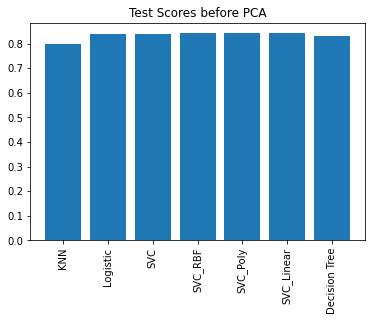

In [266]:
import matplotlib.pyplot as plt
model_run = ['KNN', 'Logistic', 'SVC', 'SVC_RBF', 'SVC_Poly','SVC_Linear','Decision Tree']
test_score = [0.798,0.838,0.839,0.841,0.841,0.842,0.831]
plt.bar(model_run,test_score)
plt.title("Test Scores before PCA")
plt.xticks(range(len(model_run)), model_run, rotation='vertical')
plt.show()


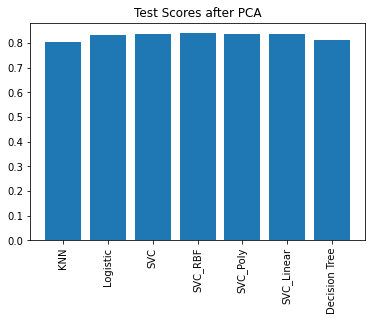

In [268]:
import matplotlib.pyplot as plt
model_run = ['KNN', 'Logistic', 'SVC', 'SVC_RBF', 'SVC_Poly','SVC_Linear','Decision Tree']
test_score = [0.803,0.832,0.837,0.840,0.835,0.838,0.813]
plt.bar(model_run,test_score)
plt.title("Test Scores after PCA")
plt.xticks(range(len(model_run)), model_run, rotation='vertical')
plt.show()


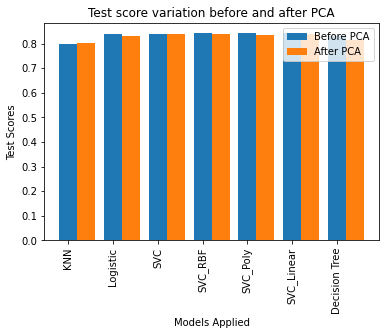

In [275]:
import matplotlib.pyplot as plt
import numpy as np

w=0.4
x = ['KNN', 'Logistic', 'SVC', 'SVC_RBF', 'SVC_Poly','SVC_Linear','Decision Tree']
before_PCA = [0.798,0.838,0.839,0.841,0.841,0.842,0.831]
after_PCA = [0.803,0.832,0.837,0.840,0.835,0.838,0.813]

bar1=np.arange(len(x))
bar2= [i+w for i in bar1]

plt.bar(bar1,before_PCA,w,label="Before PCA")
plt.bar(bar2,after_PCA,w,label="After PCA")

plt.xlabel("Models Applied")
plt.ylabel("Test Scores")
plt.title("Test score variation before and after PCA")
plt.legend()
plt.xticks(range(len(x)), x, rotation='vertical')
plt.show()

Based on the above visualization, we can see that there is no additional benefit of adding PCA to this data set for any of the models.

# Deep Learning Models

In [172]:
#pip install --user --ignore-installed --upgrade tensorflow 


### Multilayer Perceptron

In [252]:
import tensorflow
import keras
from keras import Sequential
from keras.layers import Dense

In [253]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (6603, 33)
y_train shape (6603,)
X_test shape (2202, 33)
y_test shape (2202,)


In [254]:
def create_model():
    model=Sequential()
    model.add(Dense(16,input_dim=33,kernel_initializer='normal',activation="relu"))
    model.add(Dense(8,activation="relu"))
    #model.add(Dropout(0.2))
    model.add(Dense(2,kernel_initializer="normal"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
    return model

In [255]:
model=create_model()

In [256]:
model.fit(X_train,y_train,batch_size=128,epochs=20)

Epoch 1/20
52/52 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7518
Epoch 2/20
52/52 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7780
Epoch 3/20
52/52 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7780
Epoch 4/20
52/52 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7780
Epoch 5/20
52/52 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7780
Epoch 6/20
52/52 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7780
Epoch 7/20
52/52 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7780
Epoch 8/20
52/52 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7780
Epoch 9/20
52/52 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.7780
Epoch 10/20
52/52 [==============================] - 0s 1ms/step - loss: 0.0000e+0

In [257]:
train_loss_and_metrics = model.evaluate(X_train,y_train)
test_loss_and_metrics = model.evaluate(X_test,y_test)

print("Train Loss: ",train_loss_and_metrics[0])
print("Train Accuracy: ",train_loss_and_metrics[1])

print("Test Loss: ",test_loss_and_metrics[0])
print("Test Accuracy: ",test_loss_and_metrics[1])

69/69 [==============================] - 0s 927us/step - loss: 0.0000e+00 - accuracy: 0.7820
Train Loss:  0.0
Train Accuracy:  0.7779797315597534
Test Loss:  0.0
Test Accuracy:  0.7820163369178772


In [258]:
predict_x=model.predict(X_test) 
predicted_class=np.argmax(predict_x,axis=1)
b=np.reshape(predicted_class,(-1))
correct_indices=np.nonzero(b==np.array(y_test))[0]
incorrect_indices=np.nonzero(b!=np.array(y_test))[0]
print()
print(len(correct_indices),"Classified Correctly")
print(len(incorrect_indices),"Classified Incorrectly")


1722 Classified Correctly
480 Classified Incorrectly


In [259]:
tensorflow.__version__

'2.7.0'

### Tensor Board

In [260]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [261]:
import tensorflow as tf
import datetime

In [262]:
def create_model():
    return tf.keras.models.Sequential([
        tf.keras.layers.Dense(4, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(4, activation='softmax')
  ])

In [263]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(X_test, y_test), 
          callbacks=[tensorboard_callback])

Epoch 1/5
207/207 [==============================] - 1s 2ms/step - loss: 0.9088 - accuracy: 0.6794 - val_loss: 0.5716 - val_accuracy: 0.7820
Epoch 2/5
207/207 [==============================] - 0s 1ms/step - loss: 0.6017 - accuracy: 0.7768 - val_loss: 0.5304 - val_accuracy: 0.7820
Epoch 3/5
207/207 [==============================] - 0s 1ms/step - loss: 0.5750 - accuracy: 0.7780 - val_loss: 0.5176 - val_accuracy: 0.7820
Epoch 4/5
207/207 [==============================] - 0s 1ms/step - loss: 0.5638 - accuracy: 0.7780 - val_loss: 0.5105 - val_accuracy: 0.7820
Epoch 5/5
207/207 [==============================] - 0s 1ms/step - loss: 0.5514 - accuracy: 0.7780 - val_loss: 0.5057 - val_accuracy: 0.7820


In [264]:
#predicted_class=model.predict_classes(X_test)

predict_x=model.predict(X_test) 
predicted_class=np.argmax(predict_x,axis=1)
b=np.reshape(predicted_class,(-1))
correct_indices=np.nonzero(b==np.array(y_test))[0]
incorrect_indices=np.nonzero(b!=np.array(y_test))[0]
print()
print(len(correct_indices),"Classified Correctly")
print(len(incorrect_indices),"Classified Incorrectly")


1722 Classified Correctly
480 Classified Incorrectly


As per the output of Deep learning models, we can see 1722 classes are classified correctly while 480 classes are classified incorrectly. 